# Fixed Broadband Provider (FBP) Report

## Intro
The goal of this report is to get an idea of the FBP landscape in Pennsylvania (specifically Montgomery County), and identify any untapped wireless markets, geographic or otherwise.

***
###  A Warning from the FCC (IMPORTANT)
From the [explanation of FCC Data](https://www.fcc.gov/general/explanation-broadband-deployment-data):  A provider that reports deployment of a particular technology and bandwidth in a particular census block may not necessarily offer that particular service everywhere in the census block. Accordingly, a list of providers deployed in a census block does not necessarily reflect the number of choices available to any particular household or business location in that block, and the number of such providers in the census block does not purport to measure competition.

#### My thoughts on this
The conclusions we draw here will have to be taken with a grain of salt, and will need to do additional research to verify any insights.

***
## Initial Exploration

Before we do some filtering, lets take a look the raw stats of FBP's in PA.

In [1]:
# imports and settings
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
import datetime as dt
from IPython.core.display import display, HTML
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 200
from IPython.display import display, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Reading in FCC fbp data
filepath = "../data/bb_data.csv"
fbp_df = pd.read_csv(filepath)

# Reading in PA population densities
filepath = "../data/us2016.csv"
pop_df = pd.read_csv(filepath)

In [3]:
# Pennsylvania population density
pa_fbp_df = fbp_df[fbp_df['State'] == 'PA']
pa_pop_df = pop_df[pop_df['stateabbr'] == 'PA']

'''
Population information:

hu = housing units
hh = households
pop = population

'''
cols = ['stateabbr','block_fips','hu2016','hh2016','pop2016']
pa_pop_df = pa_pop_df[cols]

pa_pop_rows = pa_pop_df.shape[0]
pa_pop_cols = pa_pop_df.shape[1]

pa_fbp_col_names = pa_fbp_df.columns.values
pa_fbp_rows = pa_fbp_df.shape[0]
pa_fbp_cols = pa_fbp_df.shape[1]

In [4]:
state_list = ['PA','NJ','DE']
county_fips = {}
county_fips['42091'] = 'montgomery' 
county_fips['42017'] = 'bucks'
county_fips['42077'] = 'lehigh'
county_fips['42011'] = 'berks'
county_fips['42095'] = 'northampton'
county_fips['42071'] = 'lancaster'
county_fips['34021'] = 'mercy'
county_fips['42101'] = 'philadelphia'
county_fips['42075'] = 'lebanon'
county_fips['42043'] = 'dauphin'
county_fips['42133'] = 'york'
county_fips['42133'] = 'northampton'
county_fips['42029'] = 'chester'
county_fips['10003'] = 'new_castle'
county_fips['34015'] = 'gloucester'
county_fips['34005'] = 'burlington'
county_fips['34019'] = 'hunterdon'
county_fips['34029'] = 'ocean'
county_fips['34011'] = 'cumberland'
county_fips['42001'] = 'adams'
county_fips['42055'] = 'franklin'
county_fips['34023'] = 'middlesex'
county_fips['34035'] = 'somerset' 
county_fips['34007'] = 'camden'
county_fips['10001'] = 'kent'
county_fips['34001'] = 'atlantic'
county_fips['42025'] = 'carbon'
county_fips['42089'] = 'monroe'
county_fips['42107'] = 'schuylkill'
county_fips['34041'] = 'warren'
county_fips['34039'] = 'union'
county_fips['42051'] = 'fayette'
county_fips['42129'] = 'westmoreland'

In [5]:
# Markdown
Markdown("""
### The Data
#### fbp Data
The table of PA fbp's has {fbp_rows} rows and {fbp_cols} columns.  See a preview of the table below.
""".format(fbp_rows = pa_fbp_rows, fbp_cols = pa_fbp_cols))


### The Data
#### fbp Data
The table of PA fbp's has 2588294 rows and 17 columns.  See a preview of the table below.


In [6]:
# Table preview
fbp_df.head()

,Logical Record Number,Provider ID,FRN,Provider Name,DBA Name,Holding Company Name,Holding Company Number,Holding Company Final,State,Census Block FIPS Code,Technology Code,Consumer,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps),Business,Max CIR Downstream Speed (mbps),Max CIR Upstream Speed (mbps)
0,55693912,28616,4963088,"ViaSat, Inc.",ViaSat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",CA,61110091003007,60,1,12.0,3.0,1,0.0,0.0
1,59530142,28616,4963088,"ViaSat, Inc.",ViaSat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",MS,280959506001012,60,1,25.0,3.0,1,0.0,0.0
2,58480938,28616,4963088,"ViaSat, Inc.",ViaSat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",ME,230039523003058,60,1,5.0,1.0,0,0.0,0.0
3,1263572,25569,12369286,"HNS License Sub, LLC",HughesNet,Hughes Network Systems,130627,"dishNET Holding, LLC",CA,60290052011706,60,1,15.0,2.0,1,15.0,2.0
4,34429330,28453,1568880,GCI Communication Corp.,GCI Communication Corp.,"General Communication, Inc.",130534,"General Communication, Inc.",DE,100030117001025,60,0,0.0,0.0,1,0.0,0.0


In [7]:
# Some markdown
Markdown("""
#### Population Data
The table of PA Census Block population data has {pop_rows} rows and {pop_cols} columns. HU = Housing Units.  HH = Households.  POP = population.  See a preview of the table below.
""".format(pop_rows = pa_pop_rows, pop_cols = pa_pop_cols))


#### Population Data
The table of PA Census Block population data has 421545 rows and 5 columns. HU = Housing Units.  HH = Households.  POP = population.  See a preview of the table below.


In [8]:
#Table preview
pa_pop_df.head()

,stateabbr,block_fips,hu2016,hh2016,pop2016
8103116,PA,420010301011000,3,3.0,6
8103117,PA,420010301011001,9,9.0,31
8103118,PA,420010301011002,6,6.0,15
8103119,PA,420010301011003,28,27.0,79
8103120,PA,420010301011004,10,10.0,27


In [9]:
# Intial Metrics
business_count = (pa_fbp_df[pa_fbp_df['Business']==1].shape[0]/pa_fbp_df.shape[0])
consumer_count = (pa_fbp_df[pa_fbp_df['Consumer']==1].shape[0]/pa_fbp_df.shape[0])
pa_pop_metrics = (pa_pop_df['pop2016'].describe())

print(f'Percent of all PA fbps that can offer service to businesses:  {business_count}')
print(f'Percent of all PA fbps that can offer service to consumers:  {consumer_count}')
print(f'Some metrics for PA census block population data:  \n{pa_pop_metrics}')

Percent of all PA fbps that can offer service to businesses:  0.9747459137176843
Percent of all PA fbps that can offer service to consumers:  0.811675566995094
Some metrics for PA census block population data:  
count    421545.000000
mean         30.303339
std          62.219867
min           0.000000
25%           0.000000
50%          11.000000
75%          36.000000
max        4538.000000
Name: pop2016, dtype: float64


## Some figures

Plots of up & downstream speeds for Business and Consumer WISPS.

AttributeError: Unknown property bins

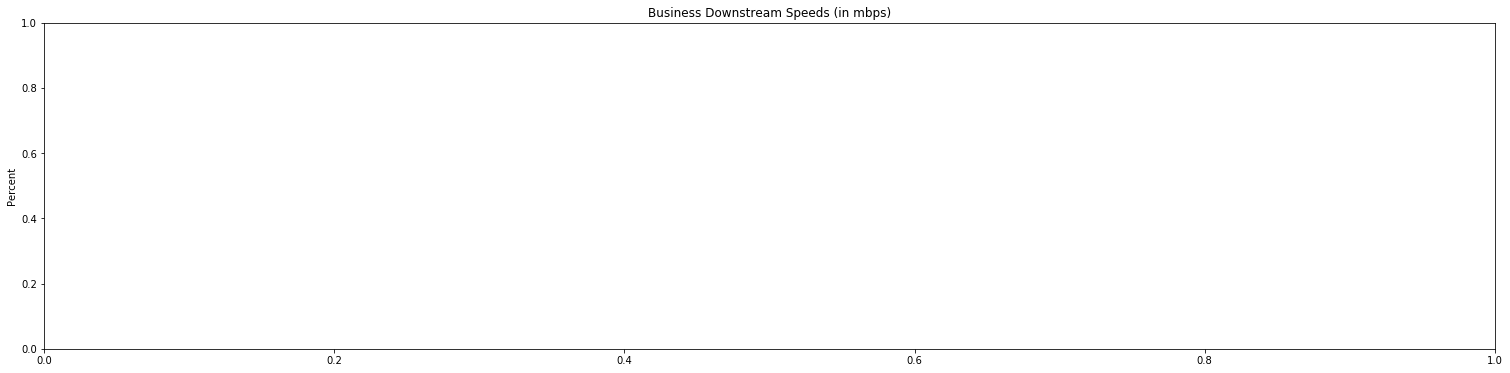

In [11]:
# Plots
fig_length = 26
fig_height = 6
# Down speeds look like for businesses in PA
plt.figure(figsize=(fig_length,fig_height))
plt.title('Business Downstream Speeds (in mbps)')
plt.ylabel('Percent')
b_down_val_counts = fbp_df['Max CIR Downstream Speed (mbps)'][fbp_df['Business']==1].value_counts(normalize=True, sort = True).sort_index().plot(kind='bar')

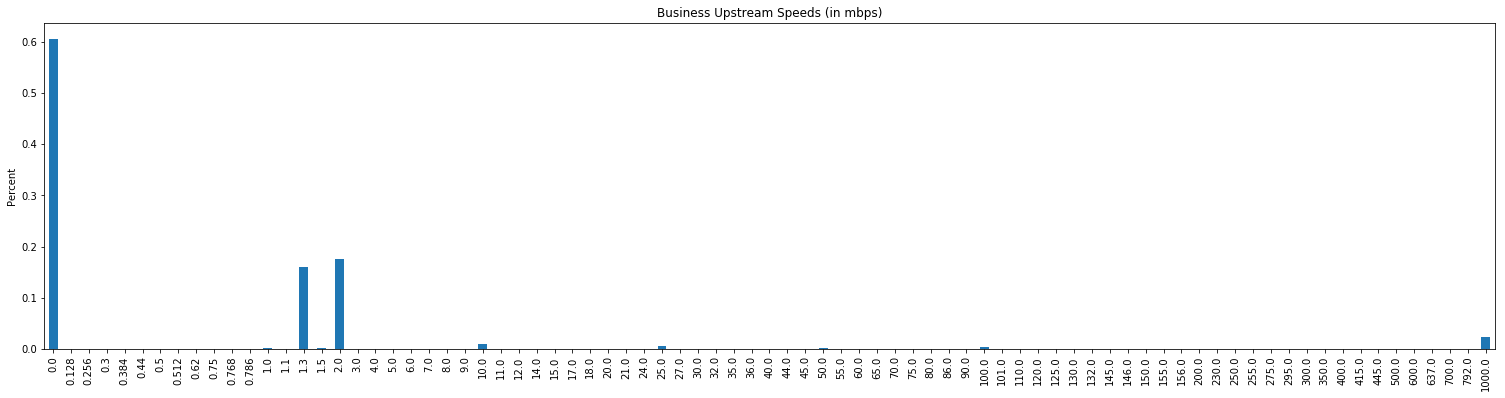

In [11]:
# Up speeds for businesses in PA
plt.figure(figsize=(fig_length,fig_height))
plt.title('Business Upstream Speeds (in mbps)')
plt.ylabel('Percent')
b_up_val_counts = fbp_df['Max CIR Upstream Speed (mbps)'][fbp_df['Business']==1].value_counts(normalize=True, sort = True).sort_index().plot(kind='bar')

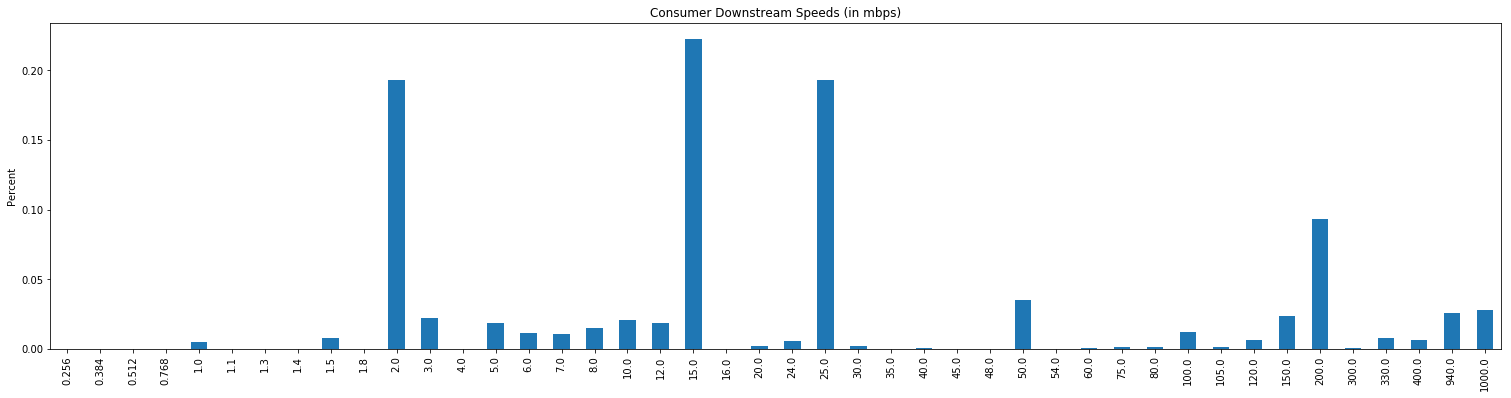

In [12]:
# Residential downstream speeds in PA
plt.figure(figsize=(fig_length,fig_height))
plt.title('Consumer Downstream Speeds (in mbps)')
plt.ylabel('Percent')
r_down_val_counts = fbp_df['Max Advertised Downstream Speed (mbps)'][fbp_df['Consumer']==1].value_counts(normalize=True, sort = True).sort_index().plot(kind='bar')

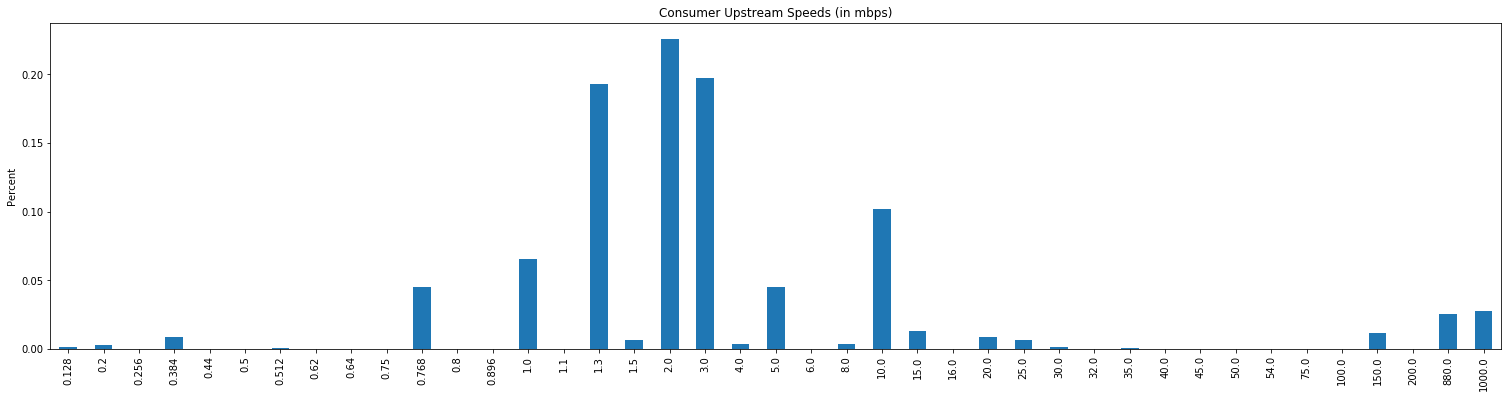

In [13]:
# Residential upstream speeds in PA
plt.figure(figsize=(fig_length,fig_height))
plt.title('Consumer Upstream Speeds (in mbps)')
plt.ylabel('Percent')
r_up_val_counts = fbp_df['Max Advertised Upstream Speed (mbps)'][fbp_df['Consumer']==1].value_counts(normalize=True, sort = True).sort_index().plot(kind='bar')

## Filtering the fbpS

See the [explanation of FCC Data](https://www.fcc.gov/general/explanation-broadband-deployment-data) here for clarification on columns.

The function below filters the available list of fbps to be analyzed. **Attributes will be filtered in Tableau**.  Attributes on which to filter:
<br>
Max Advertised Upstream Speed (mbps) 
<br>
Max Advertised Downstream Speed (mbps) 
<br>
Max CIR Upstream Speed (mbps)  
<br>
Max CIR Downstream Speed (mbps)
<br>
Business (Provider can or does offer business/government service in the block) 
<br>
Consumer (Provider can or does offer consumer/mass market/residential service in the block)  
<br>
### A Quick Note
From the [explanation of FCC Form 477 data](https://www.fcc.gov/general/explanation-broadband-deployment-data): Filer directed to report 0 if the contracted service is sold on a "best efforts" basis without a guaranteed data-throughput rate.  
<br>


In [47]:
# Function to filter fbpS
def filter_fbps(up,down,raw_df):
    start_t = dt.datetime.now()
    #state = 'PA'
    raw_df = raw_df[(raw_df['Max Advertised Upstream Speed (mbps)'] >= up) | (raw_df['Max CIR Upstream Speed (mbps)'] >= up) ]
    raw_df = raw_df[(raw_df['Max Advertised Downstream Speed (mbps)'] >= down) | (raw_df['Max CIR Downstream Speed (mbps)'] >= down)]
    #raw_df = raw_df[(raw_df['Business'] == business)]
    #raw_df = raw_df[raw_df['State'] == state]
    final_t = dt.datetime.now()
    #print(f'took {final_t - start_t} to run!')
    return raw_df

res_county_fbp_df = filter_fbps(3,20,county_fbp_df)
bus_county_fbp_df = filter_fbps(5,25,county_fbp_df)
bus_county_fbp_df = bus_county_fbp_df[bus_county_fbp_df['Business']==1]

In [48]:
# Nearby county subsets (across multiple states)
pop_df['block_fips']= pop_df['block_fips'].apply(str)
pop_df['selected_county'] = pop_df['block_fips'].map(lambda x: True if x[:5] in list(county_fips.keys()) else False)
county_pop_df = pop_df[pop_df['selected_county']==True]
county_pop_df = county_pop_df[cols]

res_county_fbp_df['Census Block FIPS Code'] = res_county_fbp_df['Census Block FIPS Code'].apply(str)
res_county_fbp_df['selected_county'] = res_county_fbp_df['Census Block FIPS Code'].map(lambda x: True if x[:5] in list(county_fips.keys()) else False)
res_county_fbp_df = res_county_fbp_df[res_county_fbp_df['selected_county'] == True]

bus_county_fbp_df['Census Block FIPS Code'] = bus_county_fbp_df['Census Block FIPS Code'].apply(str)
bus_county_fbp_df['selected_county'] = bus_county_fbp_df['Census Block FIPS Code'].map(lambda x: True if x[:5] in list(county_fips.keys()) else False)
bus_county_fbp_df = bus_county_fbp_df[bus_county_fbp_df['selected_county'] == True]

In [49]:
print(res_county_fbp_df.shape)
print(bus_county_fbp_df.shape)

(836950, 18)
(522159, 18)


In [44]:
# Montgomery Filter
'''
Create Montgomery county subsets

PA state FIPS code 42
Montgomery county FIPS code 091


pa_pop_df['block_fips']= pa_pop_df['block_fips'].apply(str)
pa_pop_df['mont_county'] = pa_pop_df['block_fips'].map(lambda x: True if x[:5] == '42091' else False)
mont_pop_df = pa_pop_df[pa_pop_df['mont_county']==True]

pa_fbp_df['Census Block FIPS Code'] = pa_fbp_df['Census Block FIPS Code'].apply(str)
pa_fbp_df['mont_county'] = pa_fbp_df['Census Block FIPS Code'].map(lambda x: True if x[:5] == '42091' else False)
mont_fbp_df = pa_fbp_df[pa_fbp_df['mont_county'] == True]

filtered_fbp_rows = pa_fbp_df.shape[0]
filtered_county_rows = mont_fbp_df.shape[0]

pa_blocks = pa_pop_df.shape[0]
mont_blocks = mont_pop_df.shape[0]


#print(f'number of blocks in montgomery county:  {mont_blocks}')
#print(f'number of eligble fbps in montgomery county:  {filtered_county_rows}')
!!!

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-44-52841714811f>, line 26)

In [50]:
# Using the groubpy function to get metrics for each census block: count, types, mean up/down speeds
def get_metrics(raw_df):
    
    # A count of all the unique fbp's in a given census block,  if block isn't included in dataframe, then there are no fbps in that block
    fbp_count_df = pd.DataFrame({'fbp_count':raw_df.groupby(['Census Block FIPS Code']).size()}).reset_index()
    fbp_count_df.set_index('Census Block FIPS Code', inplace=True)

    # Number of fbps allowed to serve consumers in the given block
    consumer_df = pd.DataFrame({'consumer_num':raw_df.groupby(['Census Block FIPS Code','Consumer']).size()}).reset_index()
    consumer_df = consumer_df[consumer_df['Consumer']==1]
    consumer_df.set_index('Census Block FIPS Code', inplace=True)

    # Number of fbps allowed to serve businesses in the given block
    business_df = pd.DataFrame({'business_num':raw_df.groupby(['Census Block FIPS Code', 'Business']).size()}).reset_index()
    business_df = business_df[business_df['Business']==1]
    business_df.set_index('Census Block FIPS Code', inplace = True)

    # Average up/downstream speeds in each census block
    adv_max_down_df = pd.DataFrame({'adv_max_down':raw_df.groupby(['Census Block FIPS Code'])['Max Advertised Downstream Speed (mbps)'].max()}).reset_index()
    adv_max_down_df.set_index('Census Block FIPS Code', inplace = True)
    
    adv_max_up_df = pd.DataFrame({'adv_max_up':raw_df.groupby(['Census Block FIPS Code'])['Max Advertised Upstream Speed (mbps)'].max()}).reset_index()
    adv_max_up_df.set_index('Census Block FIPS Code', inplace = True)
    
    cir_max_up_df = pd.DataFrame({'cir_max_up':raw_df.groupby(['Census Block FIPS Code'])['Max CIR Upstream Speed (mbps)'].max()}).reset_index()
    cir_max_up_df.set_index('Census Block FIPS Code', inplace = True)
    
    cir_max_down_df = pd.DataFrame({'cir_max_down':raw_df.groupby(['Census Block FIPS Code'])['Max CIR Downstream Speed (mbps)'].max()}).reset_index()
    cir_max_down_df.set_index('Census Block FIPS Code', inplace = True)
    
    #TODO: Merge the 7 df's
    df_list = [fbp_count_df,consumer_df,business_df,adv_max_down_df,adv_max_up_df,cir_max_up_df,cir_max_down_df]
    #print('Merging dataframes...')
    for i in df_list:
        if fbp_count_df.equals(i):
            final_df = fbp_count_df
        else:
            final_df = pd.merge(final_df,i,how='outer',left_index=True, right_index=True)
    #print('Done merging dataframes!')
    final_df.drop(['Consumer', 'Business'], axis = 1, inplace = True)
    return final_df 


# Get metrics for montgomery county
res_county_metrics_df = get_metrics(res_county_fbp_df)
bus_county_metrics_df = get_metrics(bus_county_fbp_df)

# Get metrics for all of PA
state_metrics_df = get_metrics(pa_fbp_df)

In [51]:
bus_county_metrics_df['fbp_count'].describe()

count    232148.000000
mean          2.249250
std           1.085134
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          16.000000
Name: fbp_count, dtype: float64

In [52]:
# Merging population data and fbp metrics
def merge_pop_fbp(pop_df,fbp_df):
    if (pop_df.index.name != 'block_fips'):
        pop_df.set_index('block_fips',inplace = True)
    final_df = pd.merge(pop_df, fbp_df,how = 'left', left_index = True, right_index = True)
    final_df.fillna(value = 0, inplace = True)
    final_df['density'] = final_df['fbp_count']/ (final_df['pop2016'] + 1)
    final_df.reset_index(inplace = True)
    final_df['best_available_up'] = final_df[['cir_max_up','adv_max_up']].max(axis = 1)
    final_df['best_available_down'] = final_df[['cir_max_down','adv_max_down']].max(axis = 1)
    return final_df 

# Merging metrics with population data
res_county_merged_df = merge_pop_fbp(county_pop_df, res_county_metrics_df)
bus_county_merged_df = merge_pop_fbp(county_pop_df,bus_county_metrics_df)
state_merged_df = merge_pop_fbp(pa_pop_df, state_metrics_df)

In [53]:
bus_county_merged_df.head()

,block_fips,stateabbr,hu2016,hh2016,pop2016,fbp_count,consumer_num,business_num,adv_max_down,adv_max_up,cir_max_up,cir_max_down,density,best_available_up,best_available_down
0,100010401001000,DE,28,28.0000,87,1.0,1.0,1.0,200.0,10.0,0.0,0.0,0.011364,10.0,200.0
1,100010401001001,DE,109,104.8476,304,2.0,2.0,2.0,200.0,10.0,0.0,0.0,0.006557,10.0,200.0
2,100010401001002,DE,8,8.0000,23,1.0,1.0,1.0,120.0,10.0,0.0,0.0,0.041667,10.0,120.0
3,100010401001003,DE,34,32.9376,92,1.0,1.0,1.0,120.0,10.0,0.0,0.0,0.010753,10.0,120.0
4,100010401001004,DE,22,20.9524,54,1.0,1.0,1.0,120.0,10.0,0.0,0.0,0.018182,10.0,120.0


In [54]:
## wrtie PA files to csv's
pa_fbp_df.to_csv('../data/pa_bb.txt')
pa_pop_df.to_csv('../data/pa_pop.txt')

# Write selected county and state metrics data to csv
bus_county_merged_df.reset_index(inplace=True)
res_county_merged_df.reset_index(inplace=True)
state_merged_df.reset_index(inplace=True)
res_county_merged_df.to_csv('../data/residential_county_fbp_metrics.txt')
bus_county_merged_df.to_csv('../data/business_county_fbp_metrics.txt')
state_merged_df.to_csv('../data/pa_fbp_metrics.txt')

In [97]:
# Getting CA success subset and metrics
pop_df['block_fips'] = pop_df['block_fips'].apply(str)
pop_df['is_success'] = pop_df['block_fips'].map(lambda x: True if x[:4] == '6059' else False)
success_pop_df = pop_df[pop_df['is_success'] == True]
success_pop_df = success_pop_df[cols]


ca_fbp_df = fbp_df[fbp_df['State'] == 'CA']
ca_fbp_df['Census Block FIPS Code'] = ca_fbp_df['Census Block FIPS Code'].apply(str)
ca_fbp_df['is_success'] = ca_fbp_df['Census Block FIPS Code'].map(lambda x: True if x[:4] == '6059' else False)
success_fbp_df = ca_fbp_df[ca_fbp_df['is_success'] == True]

success_metrics_df = get_metrics(success_fbp_df)
success_merged_df = merge_pop_fbp(success_pop_df, success_metrics_df)

success_merged_df['block_string'] = success_merged_df['block_fips'].map(lambda x: '0' + str(x))

success_merged_df.to_csv("../data/success_counties.txt")

success_merged_df.head()

,block_fips,stateabbr,hu2016,hh2016,pop2016,fbp_count,consumer_num,business_num,adv_max_down,adv_max_up,cir_max_up,cir_max_down,density,best_available_up,best_available_down,block_string
0,60590011011000,CA,0,0.000,2,8,6,8,300.0,20.0,100.0,100.0,2.666667,100.0,300.0,060590011011000
1,60590011011001,CA,0,0.000,1,8,6,8,300.0,20.0,100.0,100.0,4.000000,100.0,300.0,060590011011001
2,60590011011002,CA,2,1.893,0,8,6,8,300.0,20.0,100.0,100.0,8.000000,100.0,300.0,060590011011002
3,60590011011003,CA,0,0.000,0,8,6,8,300.0,20.0,100.0,100.0,8.000000,100.0,300.0,060590011011003
4,60590011011004,CA,6,6.000,17,8,6,8,300.0,20.0,100.0,100.0,0.444444,100.0,300.0,060590011011004


In [77]:
temp = ca_fbp_df['Census Block FIPS Code'].map(lambda x: x[:4])

In [81]:
temp2 = pop_df[pop_df['stateabbr']=='CA']['block_fips'].map(lambda x: x[:4])
type(temp2.value_counts().values[0])

numpy.int64

## Some Basic Measures

What are the important measures we want to see?
***
fbp breakdown by census block
<br>
Density map (fbp/population) in a given block
<br>
Heat-map of number of fbps operating in given census block (filter by type, up/down speed)
<br>
Correlation between fbp/population

In [20]:
# Eligble fbp's in an area
pa_value_counts = state_df['fbp_count'].value_counts(normalize = True)
print(f'Number of eligble fbps operating in each block in PA: \n{pa_value_counts}')

Number of eligble fbps operating in each block in PA: 
0.0     0.319297
1.0     0.281114
2.0     0.222961
3.0     0.118768
4.0     0.044377
5.0     0.011842
6.0     0.001229
7.0     0.000244
8.0     0.000081
9.0     0.000045
10.0    0.000021
12.0    0.000009
13.0    0.000005
16.0    0.000002
11.0    0.000002
14.0    0.000002
Name: fbp_count, dtype: float64


In [22]:
## Correlation between 2016 population and number of fbp's in a given census block
state_corr = np.corrcoef(state_df['pop2016'],state_df['fbp_count'].values)
county_corr = np.corrcoef(county_df['pop2016'],county_df['fbp_count'].values)
print(f'The correlation between population and fbp count in Montgomery County:  {round(county_corr[0][1],3)}')
print(f'The correlation between population and fbp count in PA:  {round(state_corr[0][1],3)}')

The correlation between population and fbp count in Montgomery County:  0.292
The correlation between population and fbp count in PA:  0.286


In [23]:
# High-level metrics on density (# of fbps/population in a given block)
state_density_describe = state_df['density'].describe()
county_density_describe = county_df['density'].describe()

print(f'High level county density metrics: \n{county_density_describe}')
print(f'High level state density metrics:  \n{state_density_describe}')

High level county density metrics: 
count    13769.000000
mean         0.167519
std          0.415670
min          0.000000
25%          0.019802
50%          0.041667
75%          0.095238
max          7.000000
Name: density, dtype: float64
High level state density metrics:  
count    421545.000000
mean          0.224408
std           0.569453
min           0.000000
25%           0.000000
50%           0.034483
75%           0.125000
max          13.000000
Name: density, dtype: float64


In [23]:
county_merged_df.head()

,block_fips,stateabbr,hu2016,hh2016,pop2016,fbp_count,consumer_num,business_num,adv_max_down,adv_max_up,cir_max_up,cir_max_down,density,best_available_up,best_available_down
0,100010401001000,DE,28,28.0000,87,2.0,2.0,2.0,200.0,10.0,0.0,0.0,0.022727,10.0,200.0
1,100010401001001,DE,109,104.8476,304,4.0,4.0,3.0,200.0,150.0,0.0,0.0,0.013115,150.0,200.0
2,100010401001002,DE,8,8.0000,23,2.0,2.0,2.0,120.0,10.0,0.0,0.0,0.083333,10.0,120.0
3,100010401001003,DE,34,32.9376,92,2.0,2.0,2.0,120.0,10.0,0.0,0.0,0.021505,10.0,120.0
4,100010401001004,DE,22,20.9524,54,2.0,2.0,2.0,120.0,10.0,0.0,0.0,0.036364,10.0,120.0


### Heat-map and Other Visualizations
See the Tableau project for repository found [here](https://public.tableau.com/profile/martin.moesta#!/vizhome/MontgomeryFBPReport/FixedBroadbandProviderReport). ** Majority of vizualization/analysis can be found here**. Can also go a lot of different directions with these visualizations, we can discuss next steps next time we talk.

Viewing these viz in the browser may be a little slow since there is a lot of data there.  No lag in viewing/interacting if you download Tableau Public and view the Story in there.

This "story" contains three visualizations:
<br>
* A heat-map of census blocks vs. filtered fbp's in Montgomery County.  Visualization is interactive, you can hover, click, filter, etc.  We can go over all functionality via Skype
* A closer look at highly populated areas with 1 or fewer eligible fbp's
* % Distribution of fbp's in a given Census Block